In [19]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## For visualizing results
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline



**IMPORTING DATASET**



In [2]:
!curl -O http://images.cocodataset.org/zips/train2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.0G  100 18.0G    0     0  54.5M      0  0:05:37  0:05:37 --:--:-- 47.1M


In [3]:
!curl -O http://images.cocodataset.org/zips/val2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  86.1M      0  0:00:09  0:00:09 --:--:-- 93.5M


In [4]:
!curl -O http://images.cocodataset.org/annotations/annotations_trainval2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  91.8M      0  0:00:02  0:00:02 --:--:-- 91.8M


In [5]:
from pycocotools.coco import COCO

In [6]:
!unzip train2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2017/000000381931.jpg  
 extracting: train2017/000000569592.jpg  
 extracting: train2017/000000229396.jpg  
 extracting: train2017/000000488990.jpg  
 extracting: train2017/000000348684.jpg  
 extracting: train2017/000000234031.jpg  
 extracting: train2017/000000563584.jpg  
 extracting: train2017/000000276069.jpg  
 extracting: train2017/000000401194.jpg  
 extracting: train2017/000000502089.jpg  
 extracting: train2017/000000192183.jpg  
 extracting: train2017/000000425127.jpg  
 extracting: train2017/000000126766.jpg  
 extracting: train2017/000000324161.jpg  
 extracting: train2017/000000452746.jpg  
 extracting: train2017/000000423782.jpg  
 extracting: train2017/000000546343.jpg  
 extracting: train2017/000000249290.jpg  
 extracting: train2017/000000025529.jpg  
 extracting: train2017/000000316928.jpg  
 extracting: train2017/000000337866.jpg  
 extracting: train2017/000000547768.jpg  
 extracting: train2017/00

In [7]:
!unzip val2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/00000036

In [8]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [9]:
ann_file="annotations/instances_val2017.json"
coco=COCO(ann_file)
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)
print(cats)

loading annotations into memory...
Done (t=0.90s)
creating index...
index created!
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'n

In [10]:
def getclassname(classId,cats):
  for i in range(len(cats)):
    if cats[i]['id']==classId:
      return cats[i]['name']
  return "None"
print('The class name is', getclassname(77, cats)) 

The class name is cell phone


In [11]:
filterClasses = [ 'person']
catIds = coco.getCatIds(catNms=filterClasses);
imgIds = coco.getImgIds(catIds=catIds);
print(imgIds)
#print("Number of images containing all required classes:", len(imgIds))

[532481, 458755, 385029, 311303, 393226, 532493, 8211, 327701, 188439, 434204, 401446, 213033, 466986, 213035, 319534, 516143, 32817, 532530, 188465, 434230, 475191, 254016, 131138, 16451, 81988, 376900, 507975, 434247, 204871, 516173, 122962, 98392, 442456, 32861, 213086, 442463, 311392, 311394, 49259, 221291, 442480, 368752, 319607, 417911, 32887, 450686, 32901, 270474, 139, 180383, 82085, 385190, 524456, 90284, 32941, 188592, 229553, 278705, 213171, 336053, 549055, 114884, 508101, 65736, 303305, 344268, 532690, 360661, 16598, 73946, 114907, 426203, 278749, 516318, 229601, 295138, 467176, 319721, 352491, 33005, 458992, 475387, 393469, 57597, 426241, 540932, 106757, 65798, 180487, 213255, 147725, 418062, 147729, 377113, 229659, 147740, 426268, 434459, 205105, 565563, 278848, 368961, 352582, 57672, 74058, 123213, 33104, 336209, 180560, 483667, 8532, 270677, 262487, 491867, 475484, 393569, 549220, 336232, 74092, 467315, 131444, 434548, 532855, 442746, 541055, 426376, 336265, 303499, 369

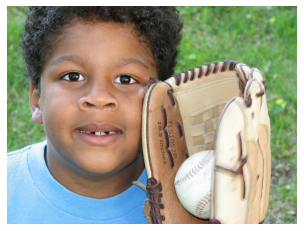

In [12]:

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I=io.imread('val2017/{}'.format(img['file_name']))/255.0
# Or use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

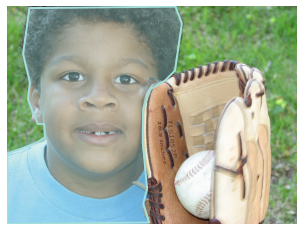

In [13]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

**Masking of Annotation Image**

1
Unique pixel values in the mask are: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


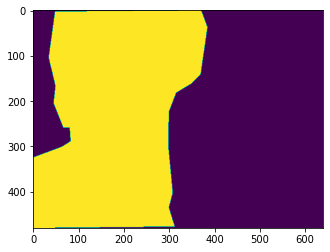

In [14]:
filterClasses = ['person']
mask = np.zeros((img['height'],img['width']))

for i in range(len(anns)):
    print(anns[i]['category_id'])
    className = getclassname(anns[i]['category_id'], cats)
    pixel_value = filterClasses.index(className)+1
    
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
plt.imshow(mask)
#print(pixel_value = filterClasses.index(className)+1)
#print(coco.annToMask(anns[1]))
print('Unique pixel values in the mask are:', mask)

In [1]:
mask=np.zeros((img['height'],img['width']))
for i in range(len(anns)):
  mask=np.maximum(coco.annToMask(anns[i]),mask)
plt.imshow(mask)  

NameError: ignored

# Data Generation

In [16]:
def filterDataset(classes=None, mode='train'):    
    # initialize COCO api for instance annotations
    annFile = 'annotations/instances_{}2017.json'.format(mode)
    coco = COCO(annFile)
    
    images = []
    if classes!=None:
        # iterate for each individual class in the list
        for className in classes:
            # get all images containing given categories
            catIds = coco.getCatIds(catNms=className)
            imgIds = coco.getImgIds(catIds=catIds)
            images += coco.loadImgs(imgIds)
    
    else:
        imgIds = coco.getImgIds()
        images = coco.loadImgs(imgIds)
    
    # Now, filter out the repeated images
    unique_images = []
    for i in range(len(images)):
        if images[i] not in unique_images:
            unique_images.append(images[i])
            
    random.shuffle(unique_images)
    dataset_size = len(unique_images)
    
    return unique_images, dataset_size, coco

In [17]:
mode='val'
classes=['person']
images, dataset_size, coco = filterDataset(classes,mode)

loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


In [18]:
def getclassname(classId,cats):
  for i in range(len(cats)):
    if cats[i]['id']==classId:
      return cats[i]['name']
  return "None"

In [20]:
def getNormalMask(imageobj,classes,coco,catIds,input_image_size):
  annIds = coco.getAnnIds(imageobj['id'],catIds=catIds,iscrowd=None)
  anns=coco.loadAnns(annIds)
  cats= coco.loadCats(catIds)
  train_mask=np.zeros(input_image_size)
  for a in range(len(anns)):
    className = getclassname(anns[a]['category_id'],cats)
    pixel_value = classes.index(className)+1
    new_mask= cv2.resize(coco.annToMask(anns[a]*pixel_value),input_image_size)
    train_mask = np.maximum(new_mask, train_mask)
    train_mask=train_mask.reshape(input_image_size[0],input_image_size[1],1)
  return train_mask  

In [ ]:
def getImage(imageObj, img_folder , input_image_size):
  train_img = io.imread(img_folder+'/'+imageObj['file_name'])/255.0
  train_img = cv2.resize(train_img,input_image_size)
  if (len(train_img.shape)==3 and train_img.shape[2]==3):
      return train_img
  else:
    stacked_img = np.stack((train_img),)*3,axis=-1)
    return stacked_img

